## Exloratory Data Analysis - Data Wrangling

### Open Food Dataset - http://world.openfoodfacts.org/data

Exploratory analysis –
 
1.	Plot French and UK Nutritional Score Values / Coverage of Nutritional Score
2.	Identify how many Unique records / Missing records for important columns
3.	Identify and Plot Top 10 Countries represented in dataset
4.	How many products have allergens
5.	How many countries publish allergens data
6.	Top 10 Countries in dataset consuming Alcohol 
7.	Identify General Categories of food items
8.	How many products have additives / Average no of Additives per Country
9.	Identify top Enumbers / Additive used in the Dataset
10.	Enumbers which are dangerous , cancerous 
11.	Top allergens in the food items
12.	For top 10 Countries ,plot or identify the top 10 categories of food.


In [3]:
#Import all important libraries needed for project

import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud
import re

Latest Data downloaded from Open Food database on 29th Nov 2016.

## Main Data

In [4]:
# Read the entire csv file into dataframe
main_data = pd.read_csv('en_openfoodfacts_Nov.csv', sep='\t' )

/Users/vingadgil/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
main_data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,...,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,fr:Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27083,http://world-en.openfoodfacts.org/product/0000...,canieatthis-app,1472223782,2016-08-26T15:03:02Z,1472223782,2016-08-26T15:03:02Z,Marks % Spencer 2 Blueberry Muffins,NaN,230g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:GB,en:united-kingdom,United Kingdom,pasteurized free range egg.sugar.blueberries (...,NaN,NaN,"milk, egg,","en:eggs,en:milk","Eggs,Milk",NaN,NaN,6.0,[ pasteurized-free-range-egg-sugar-blueberrie...,"en:e1422,en:e450,en:e481,en:e472e,en:e472b,en:...","E1422 - Acetylated distarch adipate,E450 - Dip...",0.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27205,http://world-en.openfoodfacts.org/product/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36252,http://world-en.openfoodfacts.org/product/

In [6]:
main_data.shape

(107343, 159)

## Get all Column List in the Dataset

In [7]:
# get col names
col_names = main_data.columns.values.tolist()
col_names

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

## Number of Unique Records in columns, Total number of Records

In [8]:
# Using only certain columns from the file- find the total number of entries for each column
col_names = ['code',
 'product_name',
 'quantity',
 'brands',
 'categories',
 'categories_en',
 'origins',
 'manufacturing_places',
 'countries',
 'countries_en',
 'ingredients_text',
 'allergens',
 'additives_n',
 'additives_en',
 'nutrition_grade_uk',
 'nutrition_grade_fr',
 'main_category',
 'main_category_en',
 'energy_100g',
 'fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [9]:
# for each col get missing percentage
for name in col_names:
    target_var = name
    count = len(main_data[main_data[target_var].notnull()])
    count_unique = len(main_data[target_var].unique())
    
    print ("##############")
    print (target_var)
    print ("##############")
    print ("--------------")
    print ("Total Not Null records = " + str(count))
    print ("Total no of unique records = " + str(count_unique))
    print ("..............")
    print (" ")
    print (" ")
    

##############
code
##############
--------------
Total Not Null records = 107321
Total no of unique records = 107313
..............
 
 
##############
product_name
##############
--------------
Total Not Null records = 92252
Total no of unique records = 75920
..............
 
 
##############
quantity
##############
--------------
Total Not Null records = 85537
Total no of unique records = 12086
..............
 
 
##############
brands
##############
--------------
Total Not Null records = 88640
Total no of unique records = 25721
..............
 
 
##############
categories
##############
--------------
Total Not Null records = 71682
Total no of unique records = 32151
..............
 
 
##############
categories_en
##############
--------------
Total Not Null records = 71681
Total no of unique records = 18815
..............
 
 
##############
origins
##############
--------------
Total Not Null records = 19705
Total no of unique records = 4404
..............
 
 
##############
manufac

## Get Nutritional Score for France and Uk . Plot the Nutritional Score

In [10]:
# Get nutritional score 
data_nut_score = main_data[['product_name','countries_en','nutrition-score-fr_100g','nutrition-score-uk_100g']]
data_nut_score.columns = ['product_name','countries_en','fr_score','uk_score']

data_nut_score = data_nut_score[data_nut_score.fr_score.notnull()]
data_nut_score.head()

,product_name,countries_en,fr_score,uk_score
22,Luxury Christmas Pudding,United Kingdom,10.0,10.0
23,Luxury Christmas Pudding,United Kingdom,10.0,10.0
25,"Pepsi, Nouveau goût !",France,13.0,2.0
35,7Up,France,13.0,2.0
37,Madeleines nature,France,12.0,12.0


In [18]:
len(data_nut_score)

47682

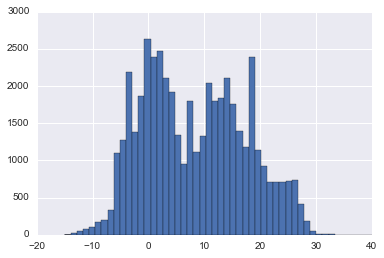

In [13]:
data_nut_score.fr_score.hist(bins=50)

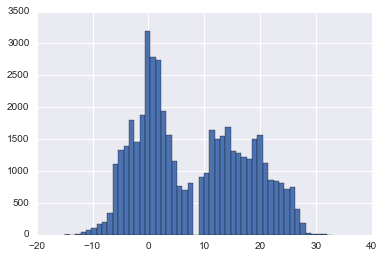

In [14]:
data_nut_score.uk_score.hist(bins=50)

Most of the cases the Nutritional Score of food items in UK and France are the same. 

In [16]:
data_nut_score[data_nut_score['fr_score'] != data_nut_score['uk_score']]

,product_name,countries_en,fr_score,uk_score
25,"Pepsi, Nouveau goût !",France,13.0,2.0
35,7Up,France,13.0,2.0
73,Marks & Spencer Curiously Strong Mints,"France,United Kingdom",20.0,14.0
148,Sunflower oil,United Kingdom,11.0,20.0
160,Mild Cheddar with Onions & Chives,France,14.0,19.0
318,Iced Coffee,United States,10.0,1.0
332,Strawberry Lemonade,United States,-2.0,-4.0
614,Foco basil seed drink,France,18.0,2.0
624,Lychee drink,France,15.0,2.0
662,Welsh Slate Cavern Aged Cheddar,United Kingdom,17.0,22.0


Out of 47,682 records there are 5942 records where the French Nutritional Score is different from UK Score.

## Find the top 10 countries updated in the dataset

In [19]:
def no_null_objects(data, columns=None):
    """
    selects rows with no NaNs
    """
    if columns is None:
        columns = data.columns
    return data[np.logical_not(np.any(data[columns].isnull().values, axis=1))]

def splitDataFrameList(df, target_column, separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split

    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row, row_accumulator, target_column, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df


In [20]:
food_countries = splitDataFrameList(no_null_objects(main_data, ["countries_en"]), "countries_en", ",")
countries = food_countries["countries_en"].value_counts()

In [21]:
countries

France                              71074
Germany                              7345
United Kingdom                       5034
Spain                                4388
Belgium                              3333
United States                        2992
Switzerland                          2874
Australia                            1973
Italy                                1200
Russia                                991
Canada                                769
Portugal                              766
Netherlands                           643
Denmark                               396
Austria                               366
Brazil                                336
Hungary                               258
Réunion                               211
Guadeloupe                            208
Czech Republic                        187
China                                 186
Ireland                               179
Luxembourg                            178
Poland                            

In [22]:
len(countries)

185

Plot top 10 Countries represented in the dataset

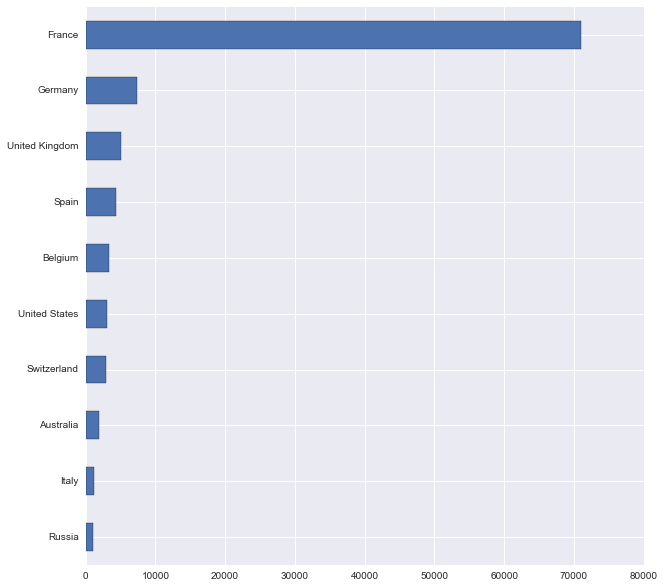

In [25]:
countries[:10][::-1].plot.barh(figsize=(10,10))

Top 10 Countries in the dataset 
1. France
2. Germany
3. United Kingdom
4. Spain
5. Belgium
6. United States
7. Switzerland
8. Australia
9. Italy
10. Russia


Using Unique names of the Countries make a Word Cloud for Countries in dataset

In [27]:
food_countries['countries'].unique()

array(['en:FR', 'France', 'en:GB', 'United Kingdom', 'en:ES', 'en:SI',
       'en:DE', 'en:IT', 'en:RO', 'España', 'en:AU', 'en:PT',
       'United States', 'Germany', 'Usa', 'France,United Kingdom',
       'États-Unis', 'Royaume-Uni,France', 'en:US', 'US', 'Switzerland',
       'en:CA', 'Nederland', 'Australia', 'en:CH', 'Ireland', 'en:RE',
       'en:TW', 'Deutschland', 'en:BR', 'Belgique', 'en:DO',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Australie', 'USA', 'en:SA',
       'en:IQ', 'en:KW', 'France,Royaume-Uni', 'Republica Moldova',
       'Belgium', 'en:NC', 'Singapore', 'en:FI', 'en:SG',
       'France,États-Unis', 'Singapore,New Zealand,Thailand,Australia',
       'en:PF', 'en:PA', 'en:CR', 'en:MX', 'France,United States',
       'Pays-Bas', 'Spain,United Kingdom,Scotland', 'Canada', '中華民國',
       'United states', 'en:CN', 'en:LU', 'en:LB', 'Spanien,Denmark',
       'België,Nederland', 'en:BE', 'en:MY', 'en:GY', 'Etats-Unis',
       'en:MQ', 'United Arab Emirates', 'Mexic

In [28]:
countries.index
temp2 = countries.index
range2 = len(temp2)

In [29]:
# Word Cloud for all countries in the dataset. Word Cloud needs one single string.

country_string = ''

# Extract DataFrame into string (adding spaces between each instance)

for i in range(range2):
    country_string += " " + temp2[i]
    
country_string    

" France Germany United Kingdom Spain Belgium United States Switzerland Australia Italy Russia Canada Portugal Netherlands Denmark Austria Brazil Hungary Réunion Guadeloupe Czech Republic China Ireland Luxembourg Poland Romania Thailand Japan Taiwan Tunisia Hong Kong Sweden Morocco Algeria New Caledonia French Guiana Martinique New Zealand Norway United Arab Emirates Greece Saudi Arabia French Polynesia Chile Mexico Singapore Argentina Bulgaria European Union Saint Pierre and Miquelon Senegal Cambodia India Lebanon Israel Finland Iraq Indonesia Iceland Turkey Colombia South Africa Kazakhstan Mauritius fr:Quebec Côte d'Ivoire Qatar Scotland Slovenia Kuwait Philippines Peru Slovakia Andorra South Korea Vietnam Monaco en:dairies Albania Venezuela Azərbaycan Costa Rica Malaysia Ukraine en:fresh-foods Azerbaijan Egypt Serbia Mayotte Gabon Malta Aruba Mongolia Latvia Cuba Bahrain Dominican Republic Malawi Iran Belarus Burkina Faso Pakistan Panama Estonia Togo Vanuatu Cook Islands Szczecin Ne

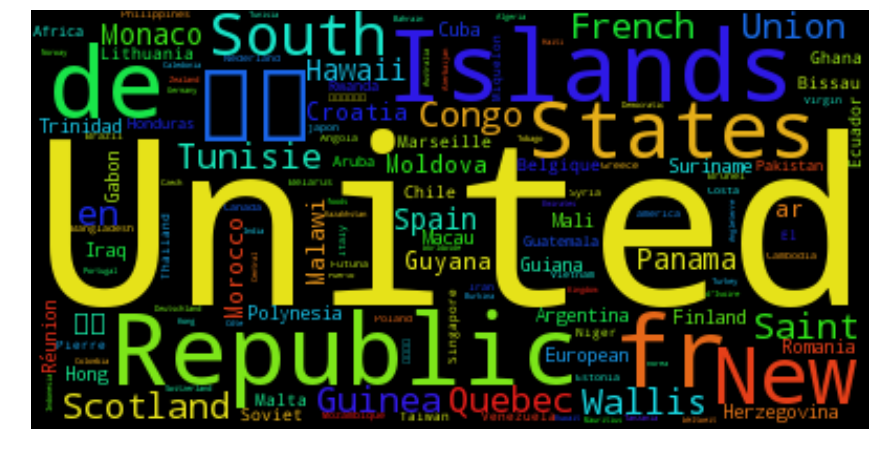

In [30]:
wordcloud = WordCloud().generate(country_string)
# Open a plot of the generated image.
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off");

## Top 10 Countries consuming alcohol

In [31]:
alcohol = main_data[main_data.alcohol_100g.notnull()]

In [32]:
alcohol[['product_name' ,'countries_en' , 'alcohol_100g']].head(10)

,product_name,countries_en,alcohol_100g
283,Fruit & Nut Granola,United States,0.0
286,Tims extra thick and crunchy jalapeno potato c...,United States,0.0
380,Kirsch,United Kingdom,43.0
427,Great Granny Crunchy Apple Chips,United States,0.0
453,Goldfish Flavor Blasted Xtra Cheddar,United States,0.0
700,Michelob ULTRA,United States,4.2
713,Go Lean Cereals,NaN,0.0
738,Zinfandel Trinity County 2009,United States,13.5
812,1% lowfat milk,United States,0.0
823,Safeway apple juice,United States,0.0


In [33]:
count_al = alcohol.countries_en.value_counts().head(10)
count_al

France            2077
Switzerland        537
Germany            242
United Kingdom     226
Spain               86
United States       84
Belgium             79
Belgium,France      44
Russia              33
Italy               27
Name: countries_en, dtype: int64

Plot top 10 countries consuming Alcohol

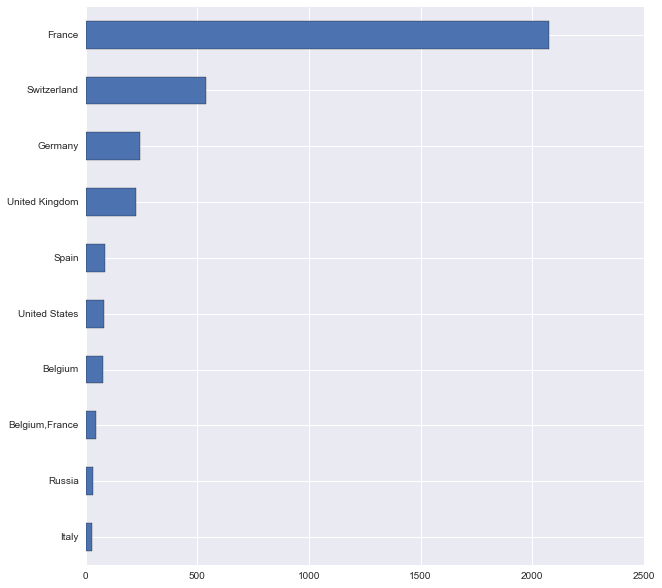

In [35]:
count_al[:10][::-1].plot.barh(figsize=(10,10))

## Various Categories of food in dataset

 Finding the Various Categories of food used in the Dataset

In [37]:
foodCategory = main_data[main_data['main_category_en'].notnull()]
foodCategory1 = foodCategory['main_category_en'].value_counts(sort=True, dropna=False)
foodCategory1 

Plant-based foods and beverages                        16226
Beverages                                               7668
Sugary snacks                                           7098
Dairies                                                 6043
Groceries                                               4568
Meats                                                   3757
Fresh foods                                             3347
Desserts                                                2293
Meals                                                   2061
Salty snacks                                            1730
Canned foods                                            1662
Fruit juices                                            1479
Seafood                                                 1343
Frozen foods                                            1339
Breakfasts                                              1089
Sandwiches                                               551
Sweeteners              

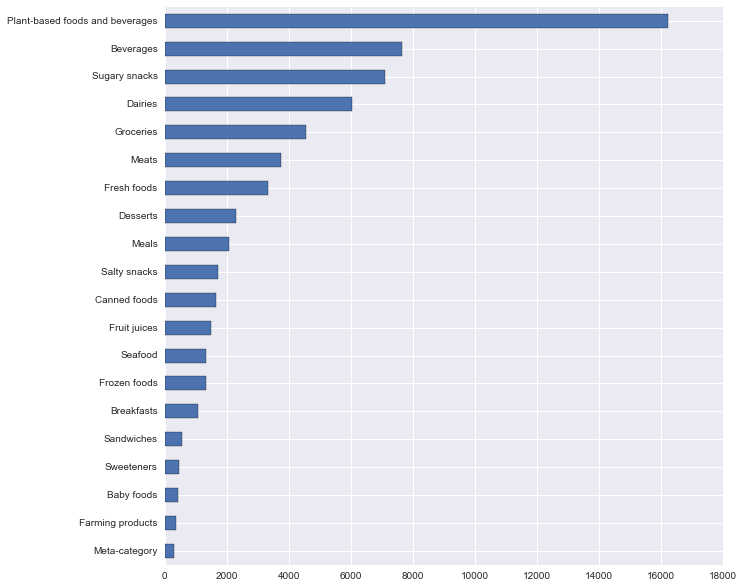

In [41]:
foodCategory1[:20][::-1].plot.barh(figsize=(10,10))


For our reference, we can actually combine many of Categories together . For Example - 
 * Meats and Fish and meat and eggs can be classified as Meats 
 * All Cookies and Sugary Snacks
 * Fruit Juices can be classified under Beverages
 * After translation from French or German we can combine Categories.

## Average no of Additives per country

Additives_n is a column which identifies number of additives for each food item. Based on this column we can identify
average number of additives for top 10 countries

In [44]:
# Convert country names to lowercase
main_data.countries = main_data.countries.str.lower()

# Fix some of the names with multiple entries
main_data.loc[main_data['countries'] == 'en:fr','countries'] = 'france'

main_data.loc[main_data['countries'] == 'en:es','countries'] = 'spain'
main_data.loc[main_data['countries'] == 'españa','countries'] ='spain'

main_data.loc[main_data['countries'] == 'en:gb','countries'] ='united kingdom'
main_data.loc[main_data['countries'] == 'en:uk','countries'] ='united kingdom'

main_data.loc[main_data['countries'] == 'us','countries'] = 'united states'
main_data.loc[main_data['countries'] == 'en:us','countries'] ='united states'
main_data.loc[main_data['countries'] == 'usa','countries'] = 'united states'

#main_data.loc[main_data['countries'] == 'en:cn','countries'] = 'canada'

main_data.loc[main_data['countries'] == 'en:au','countries'] = 'australia'

main_data.loc[main_data['countries'] == 'en:de','countries'] ='germany'
main_data.loc[main_data['countries'] == 'deutschland','countries'] ='germany'


main_data.loc[main_data['countries'] == 'en:ch','countries'] = 'switzerland'

main_data.loc[main_data['countries'] == 'en:be','countries'] = 'belgium'

main_data.loc[main_data['countries'] == 'en:it','countries'] = 'italy'

main_data.loc[main_data['countries'] == 'en:ru','countries'] = 'russia'

In [45]:
# Pick 10 countries countries
countries = ['france','switzerland','united kingdom','spain','germany','united states','australia','italy','russia']

# Subset the data
sub_df = main_data[main_data.countries.isin(countries)]
sub_df = sub_df[sub_df.additives_n.notnull()]

# Get mean # of additives for each country
df_groupedby = sub_df.groupby(['countries']).mean().additives_n.reset_index()

# Convert to numpy array
df_np = np.array(df_groupedby)

# Sort the data descending by # of additives
df_np = df_np[df_np[:,1].argsort()[::-1]]

df_np

array([['united states', 2.1527050610820244],
       ['france', 1.8909544015626052],
       ['switzerland', 1.436241610738255],
       ['united kingdom', 1.3952153110047847],
       ['russia', 1.25],
       ['italy', 0.9661016949152542],
       ['spain', 0.9412698412698413],
       ['germany', 0.8230471418811205],
       ['australia', 0.4892638036809816]], dtype=object)

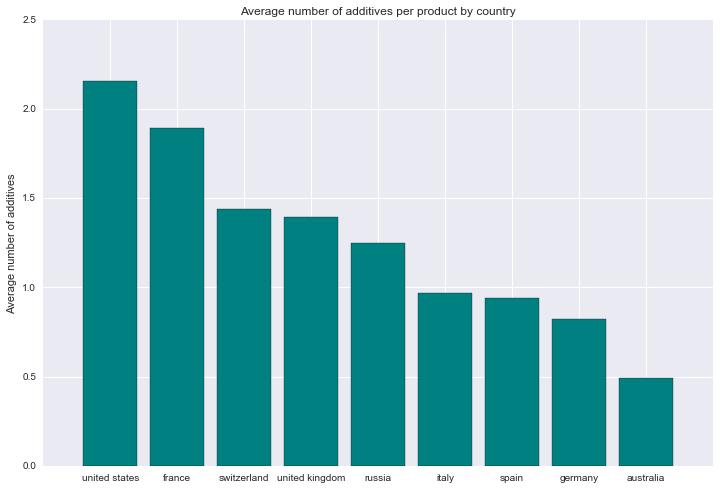

In [46]:
# Ready the plot
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
y_pos = np.arange(len(df_np[:,0]))
x_pos = df_np[:,1]
x_ticks = df_np[:,0]

# Make a barplot
plt.bar(y_pos, x_pos, align='center', color='teal')
plt.title('Average number of additives per product by country')
plt.xticks(y_pos, x_ticks)
plt.ylabel('Average number of additives') 
plt.show()

### Plot Additives as Word Cloud in Dataset

In [47]:
food_additives = main_data[['code','product_name','additives']]
food_additives = food_additives[food_additives.additives.notnull()]
food_additives.head()

,code,product_name,additives
2,27083,Marks % Spencer 2 Blueberry Muffins,[ pasteurized-free-range-egg-sugar-blueberrie...
7,56434,diet lemonade by Sainsbury's,[ carbonated-water -> en:carbonated-water ] ...
8,1071894,Flute,[ wheat -> en:wheat ]
9,1471762,still Scottish water,[ water -> en:water ]
10,1798180,Fairtrade Ground Cinnamon,[ cinnamon -> en:cinnamon ]


In [48]:
food_additives.additives = food_additives.additives.str.lower()
food_add = splitDataFrameList(no_null_objects(food_additives, ["additives"]), "additives", ",")
count_additives = food_add["additives"].value_counts()


In [49]:
food_add.head()

,additives,code,product_name
0,[ pasteurized-free-range-egg-sugar-blueberrie...,27083,Marks % Spencer 2 Blueberry Muffins
1,[ carbonated-water -> en:carbonated-water ] ...,56434,diet lemonade by Sainsbury's
2,[ wheat -> en:wheat ],1071894,Flute
3,[ water -> en:water ],1471762,still Scottish water
4,[ cinnamon -> en:cinnamon ],1798180,Fairtrade Ground Cinnamon


In [54]:
# To check if words are in the english dictionary.
#Credit: http://stackoverflow.com/questions/29099621/how-to-find-out-wether-a-word-exists-in-english-using-nltk
import nltk
#english_vocab = set(w.lower() for w in nltk.corpus.words.words())

# WordCloud must contain input in one long string
#additive_string = ''

# Extract DataFrame into string (adding spaces between each instance)
#for additive in range(len(food_add)):
#    additive_string += " " + str(food_add[additive])

# Clean string to leave only letters
#additive_string = ''.join([char for char in additive_string if (char.isalpha() or char == ' ')])

# Leave only words in english language (eliminates need for further cleaning)
#temp_list = additive_string.split(' ')
#additive_string = ' '.join([word for word in temp_list if word in english_vocab])

# print(additive_string)

### Plot the additive_n (No of Additives in Dataset)

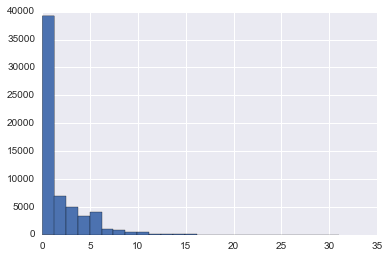

In [55]:
main_data.additives_n.hist(bins=25)

/Users/vingadgil/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


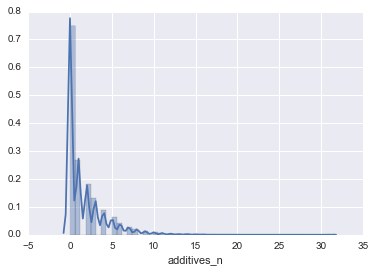

In [56]:
add_temp = main_data['additives_n']
add_temp = add_temp.dropna() 

sns.distplot(add_temp)

#### Looking at the graph above, we can deduce that on an average food items has around 4-5 additives in the ingredients

## E-Numbers in food - Identify if they are Dangerous , Cancerous..etc

In [57]:
main_add = main_data[['product_name', 'additives_n' , 'additives_en']]
main_add = main_add[main_add.additives_en.notnull()] 

In [58]:
main_add.head()

,product_name,additives_n,additives_en
2,Marks % Spencer 2 Blueberry Muffins,6.0,"E1422 - Acetylated distarch adipate,E450 - Dip..."
7,diet lemonade by Sainsbury's,4.0,"E330 - Citric acid,E331iii - Trisodium citrate..."
14,Biscuits sablés fourrage au cacao,3.0,"E1400 - Dextrin,E322 - Lecithins,E503 - Ammoni..."
17,Sirops pour ganache macarons,4.0,"E330 - Citric acid,E171 - Titanium dioxide,E21..."
22,Luxury Christmas Pudding,5.0,"E170 - Calcium carbonate,E375 - Nicotinic acid..."


In [59]:
len(main_add)

33046

#### Around 33,046 food items has additives mentioned in thier ingredients.

In [60]:
food_enos = splitDataFrameList(no_null_objects(main_add, ["additives_en"]), "additives_en", ",")
count_enos = food_enos["additives_en"].value_counts()
count_enos

E330 - Citric acid                                  9012
E322 - Lecithins                                    6114
E300 - Ascorbic acid                                4915
E250 - Sodium nitrite                               3699
E500 - Sodium carbonates                            3478
E471 - Mono- and diglycerides of fatty acids        3367
E415 - Xanthan gum                                  3357
E412 - Guar gum                                     2681
E14XX                                               2624
E407 - Carrageenan                                  2528
E202 - Potassium sorbate                            2447
E440 - Pectins                                      2432
E450 - Diphosphates                                 2335
E301 - Sodium ascorbate                             1802
E331 - Sodium citrates                              1633
E503 - Ammonium carbonates                          1511
E160a - Alpha-carotene                              1471
E621 - Monosodium glutamate    

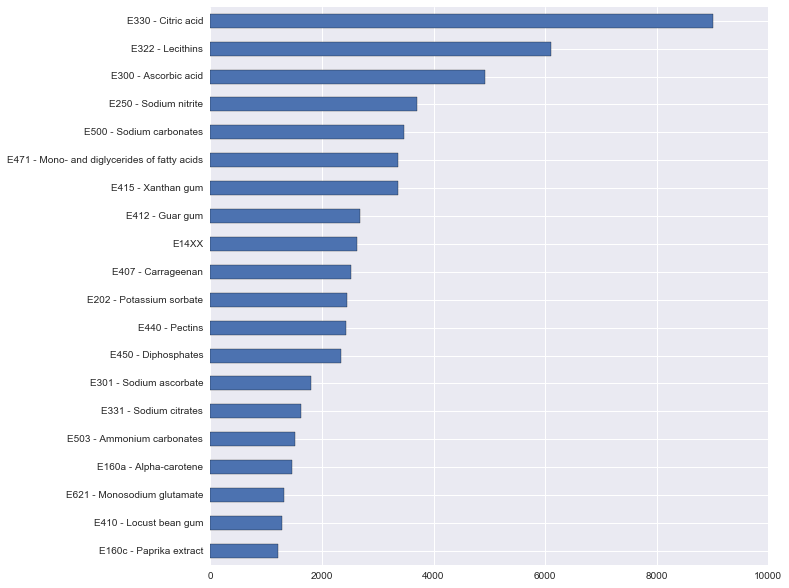

In [61]:
count_enos[:20][::-1].plot.barh(figsize=(10,10))

In [62]:
main_add = main_add[main_add.product_name.notnull()]
main_add.head()

,product_name,additives_n,additives_en
2,Marks % Spencer 2 Blueberry Muffins,6.0,"E1422 - Acetylated distarch adipate,E450 - Dip..."
7,diet lemonade by Sainsbury's,4.0,"E330 - Citric acid,E331iii - Trisodium citrate..."
14,Biscuits sablés fourrage au cacao,3.0,"E1400 - Dextrin,E322 - Lecithins,E503 - Ammoni..."
17,Sirops pour ganache macarons,4.0,"E330 - Citric acid,E171 - Titanium dioxide,E21..."
22,Luxury Christmas Pudding,5.0,"E170 - Calcium carbonate,E375 - Nicotinic acid..."


### Check if Additives in the dataset are among dangerous ones
http://www.shutterstock.com/pic-243048142/stock-vector-the-table-of-harmful-food-additives.html

Based on the ENumbers in food items, we identify how many of food items classify under the following -
* Highly Dangerous
* Dangerous
* Cancerous - Additive can be Carcigenic
* Dangerous to children
* Cause Gastric Disturbance


In [64]:
# Highly Dangerous
str_hd = 'E123|E510|E513|E527|E621'
main_add['high_dang'] = main_add['additives_en'].str.match(str_hd,case = '1', na='0')
main_add.high_dang = main_add.high_dang.astype(int)

# Dangerous
str_dan = 'E102|E110|E120|E127|E155|E180|E124|E129|E210|E220|E222|E223|E224|E228|E233|E242'
main_add['dangerous'] = main_add['additives_en'].str.match(str_dan,case = '1', na='0')
main_add.dangerous = main_add.dangerous.astype(int)

# Cancerous 
str_can = 'E131|E142|E153|E210|E212|E213|E214|E215|E216|E219|E230|E240|E249|E280|E281|E282'
main_add['cancerous'] = main_add['additives_en'].str.match(str_can,case = '1', na='0')
main_add.cancerous = main_add.cancerous.astype(int)

# Cause Gastric Disturbance
str_gd = 'E338|E339|E340|E341|E343|E450|E461|E462|E463|E465|E66'
main_add['gastric_dis'] = main_add['additives_en'].str.match(str_gd,case = '1', na='0')
main_add.gastric_dis = main_add.gastric_dis.astype(int)

# Dangerous to Children
main_add['child_dang'] = main_add['additives_en'].str.match('E270',case = '1', na='0')
main_add.child_dang = main_add.child_dang.astype(int)

# Dermatoses
str_d = 'E151|E160|E231|E232|E239|E311|E312|E320|E907|E951|E1105'
main_add['dermatoses'] = main_add['additives_en'].str.match(str_d,case = '1', na='0')
main_add.dermatoses = main_add.dermatoses.astype(int)

In [67]:
main_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32889 entries, 2 to 107294
Data columns (total 9 columns):
product_name    32889 non-null object
additives_n     32889 non-null float64
additives_en    32889 non-null object
high_dang       32889 non-null int64
dangerous       32889 non-null int64
cancerous       32889 non-null int64
gastric_dis     32889 non-null int64
child_dang      32889 non-null int64
dermatoses      32889 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 2.5+ MB


Total No of items that could be Cancerous in dataset

In [68]:
len(main_add[main_add['cancerous'] == 1])

284

Total No of items that could be Highly Dangerous in dataset

In [69]:
len(main_add[main_add['high_dang'] == 1])

635

Total No of items that could cause Gastric Disturbance in dataset

In [70]:
len(main_add[main_add['gastric_dis'] == 1])

1225

Total No of items that could be Dangerous in dataset

In [71]:
len(main_add[main_add['dangerous'] == 1])

971

Total No of items that are Dangerous to Children in dataset

In [72]:
len(main_add[main_add['child_dang'] == 1])

393

Total No of items which are not good for Skin - Dermatoses

In [73]:
len(main_add[main_add['dermatoses'] == 1])

1219

In [74]:
total_values = [main_add['cancerous'].sum(),main_add['high_dang'].sum(),main_add['dangerous'].sum(),
                main_add['gastric_dis'].sum(),main_add['child_dang'].sum(),main_add['dermatoses'].sum()]
total_values

[284, 635, 971, 1225, 393, 1219]

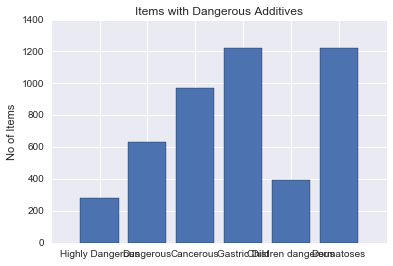

In [81]:
add_type = ['Highly Dangerous','Dangerous','Cancerous','Gastric Dist','Children dangerous','Dermatoses']

y_pos = np.arange(len(add_type))

plt.bar(y_pos, total_values, align='center', alpha=1.0)
plt.title('Items with Dangerous Additives')
plt.xticks(y_pos, add_type)
plt.ylabel('No of Items')
plt.show()

Out of 32,889 records with E-numbers,percentage of number of food items which are dangerous are less. But its always better to avoid food items with these Enumbers.

## Find Allergens mentioned in dataset - Plot Wordcloud for Allergens

In [83]:
# Find the allergens for the products
food_allergens = main_data[['product_name','allergens','allergens_en']]
food_allergens = food_allergens[food_allergens.allergens.notnull()]
food_allergens.head()


,product_name,allergens,allergens_en
14,Biscuits sablés fourrage au cacao,"Blé, Beurre, Oeufs, Noisette",NaN
22,Luxury Christmas Pudding,"Wheat Flour, Milk, Walnuts, Almonds, Nut, Whea...",NaN
23,Luxury Christmas Pudding,"Wheat Flour, Milk, Walnuts, Almonds, Nut, Whea...",NaN
34,Salsa de mostaza,mostaza,NaN
37,Madeleines nature,"blé, oeufs, blé, lait",NaN


23315

In [85]:
food_allergens.allergens = food_allergens.allergens.str.lower()
food_all = splitDataFrameList(no_null_objects(food_allergens, ["allergens"]), "allergens", ",")
countries_allergens = food_all["allergens"].value_counts()

countries_allergens.head(25)

 lait          11735
 blé            7380
blé             5625
lait            4685
 soja           3977
 beurre         2456
 moutarde       1762
 lactose        1641
 gluten         1633
 crème          1592
 oeufs          1376
 orge           1343
 œuf            1251
 œufs           1243
 oeuf           1179
soja             995
 céleri          744
 lactosérum      719
 noisettes       712
 fromage         710
 milk            704
 sulfites        630
gluten           541
 poisson         539
céleri           535
Name: allergens, dtype: int64

In [86]:
# Word Cloud for all allergens in the dataset
# Word Cloud needs one single string.

temp1 = food_all['allergens'].unique()
len(countries_allergens)
range1 = len(temp1)

allergens_string = ''

# Extract DataFrame into string (adding spaces between each instance)

for i in range(range1):
    allergens_string += " " + temp1[i]

In [87]:
allergens_string

" blé  beurre  oeufs  noisette wheat flour  milk  walnuts  almonds  nut  wheat flour  barley  barley malt extract mostaza  blé  lait  gluten  avoine wheat  wheat  cheese  butter  cream lait fromage milk  soya almonds  hazelnuts  lactose hazelnuts  soy  whey  soybean  rye soy  soybeans  nuts soybean crustacé  œufs  poisson  moutarde oats  oat  pecans  sesame peanut  peanut soybeans  soja peanuts fish  celery  eggs  egg  macadamia nuts  tree nut  pecan  macadamia  walnut  cashew  almond  coconut  milkfat  huile de beurre  noix de pécan  fruits à coques moulus  pécan  noix  cajou  amande soja  lait écrémé  noix de macadamia  fruits à coque  poudre de lait entier  fruit à coque moulus  fromage  céleri  crème  lactosérum amandes pistaches noix cream  peanuts almond  sulphites  dairy sardines eggs  mustard  buttermilk  lactic acid anchois coconut butter lactose cashews  cashews froment oat sulfites cacahuètes  soya lecithin  arachide  cacahuètes  cacahuète cacahuetes  cacahuetes  ble sweet c

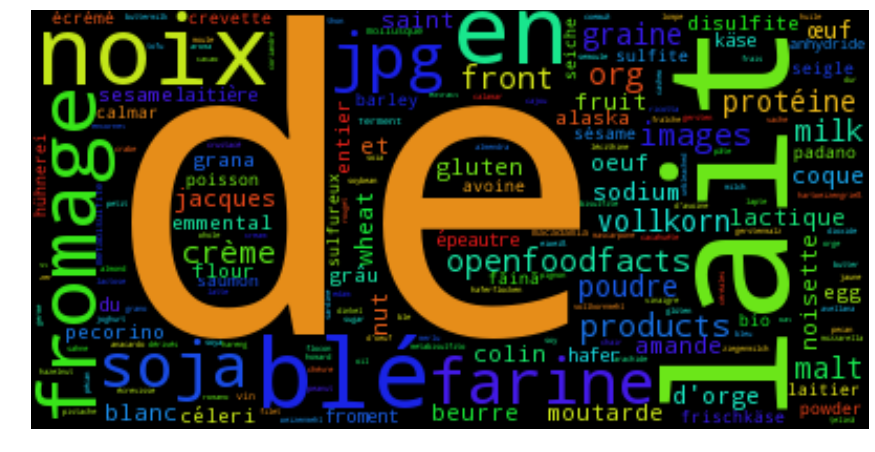

In [88]:
wordcloud = WordCloud().generate(allergens_string)
# Open a plot of the generated image.
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off");

In [89]:
main_cat = main_data[['code','product_name','categories_en','main_category_en']]

In [90]:
main_cat = main_cat[main_cat.main_category_en.notnull()]
main_cat.head()

,code,product_name,categories_en,main_category_en
1,24600,Filet de bœuf,fr:Filet-de-boeuf,fr:Filet-de-boeuf
8,1071894,Flute,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages
12,5200016,lentilles vertes,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages
13,7020254,NaN,fr:Root-bier,fr:Root-bier
14,7730009,Biscuits sablés fourrage au cacao,"Sugary snacks,Biscuits and cakes,Biscuits,fr:S...",Sugary snacks


## Identify type of food consumed by Top 10 countries in Dataset

In [103]:
# Category list 
Category_list = ['Plant-based foods and beverages', 'Sugary snacks', 'Beverages','Dairies', 'Groceries',  
'Meats',  'Fresh foods' ,'Meals','Salty snacks' ,'Canned foods','Frozen foods','Fruit juices','Breakfasts',  
'Seafood', 'Desserts']  

#labels: list of Strings with country names
#returns the rows that have as country name any of the names in labels
def get_rows_country(labels):
    return main_data[main_data.countries.isin(labels)]

#labels: list of Strings with country names
#returns the categories and the percentage that appear in the rows of a particular country
def get_categories_counts(labels):
    rows = get_rows_country(labels)
    food_cat = rows[rows.main_category_en.isin(Category_list)] 
    food_country = food_cat.main_category_en.value_counts() / len(rows)*100
#    food_country = food_cat.main_category_en.value_counts()
    return food_country


#France
labels_france = ['france','France', 'en:FR', 'France,Europe','Belgique,France']
french_food = get_categories_counts(labels_france)

#Switzerland
labels_switzerland = ['Suisse','Switzerland','switzerland']
suisse_food = get_categories_counts(labels_switzerland)

#Germany
labels_germany = ['Deutschland','Germany','Allemagne','en:DE','germany']
german_food = get_categories_counts(labels_germany)

#United Kingdom
labels_uk = ['en:UK','United Kingdom','en:GB','uk','UK','united kingdom']
uk_food = get_categories_counts(labels_uk)

#Belgium
labels_belgium = ['Belgique','en:BE','Belgique,France','Belgium','Belgique,France','belgium']
belgium_food = get_categories_counts(labels_belgium)

#Italia
labels_italia = ['Italia','en:IT','Italie','italy']
italy_food = get_categories_counts(labels_italia)

#Spain
labels_spain = ['España','en:ES','Espagne','Spain','spain']
spanish_food = get_categories_counts(labels_spain)

#Portugal
labels_portugal = ['Portugal','en:portugal','portugal']
portugal_food = get_categories_counts(labels_portugal)

#United States
labels_us = ['United States','en:united-states','united states']
us_food = get_categories_counts(labels_us)

#Australia
labels_australia = ['Australia','en:australia','australia']
australia_food = get_categories_counts(labels_australia)

#convert each Seried to a dataframe
french_df = pd.DataFrame({'Category':french_food.index, 'Count_fr':french_food.values}) # France

german_df = pd.DataFrame({'Category':german_food.index, 'Count_de':german_food.values}) # Germany

suisse_df = pd.DataFrame({'Category':suisse_food.index, 'Count_ch':suisse_food.values}) # Switzerland

uk_df = pd.DataFrame({'Category':uk_food.index, 'Count_uk':uk_food.values}) # United Kingdom

belgium_df = pd.DataFrame({'Category':belgium_food.index, 'Count_be':belgium_food.values}) # Belgium

spain_df = pd.DataFrame({'Category':spanish_food.index, 'Count_es':spanish_food.values}) # Spain

portugal_df = pd.DataFrame({'Category':portugal_food.index, 'Count_pt':portugal_food.values}) # Portugal

us_df = pd.DataFrame({'Category':us_food.index, 'Count_us':us_food.values}) # United States

australia_df = pd.DataFrame({'Category':australia_food.index, 'Count_au':australia_food.values}) # Australia

italy_df = pd.DataFrame({'Category':italy_food.index, 'Count_it':italy_food.values}) # Italy


##### French Categories 

French people consume Plant based food, sugary snacks more than any category

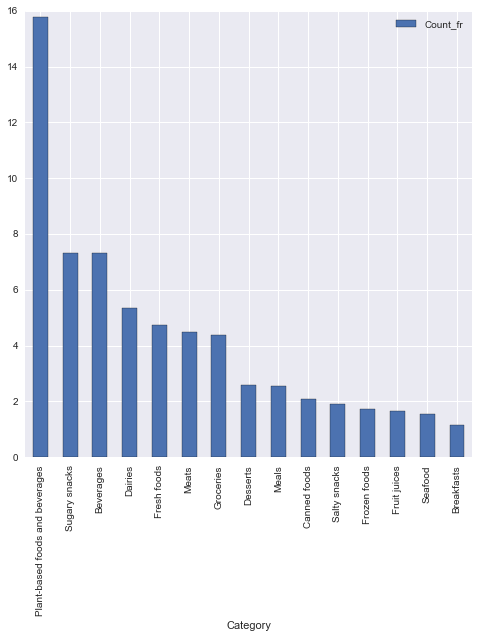

In [106]:
french_df1 = french_df.set_index('Category')
french_df1.plot(kind="bar",
                 figsize=(8,8))

##### Switzerland Categories

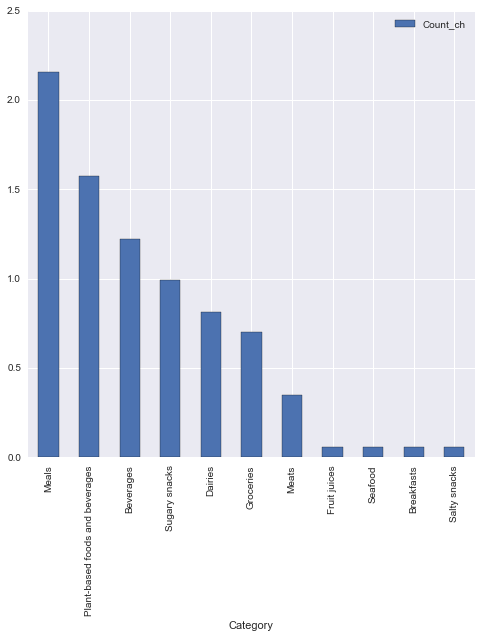

In [105]:
suisse_df1 = suisse_df.set_index('Category')
suisse_df1.plot(kind="bar",
                 figsize=(8,8))

##### German Categories

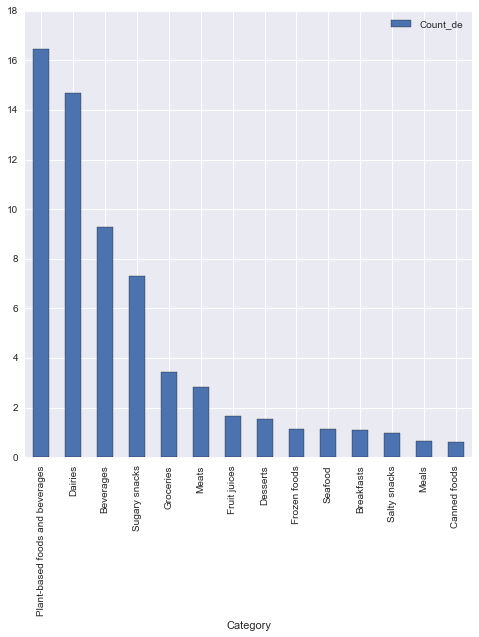

In [108]:
german_df1 = german_df.set_index('Category')
german_df1.plot(kind="bar",
                 figsize=(8,8))

#### Spain Categories

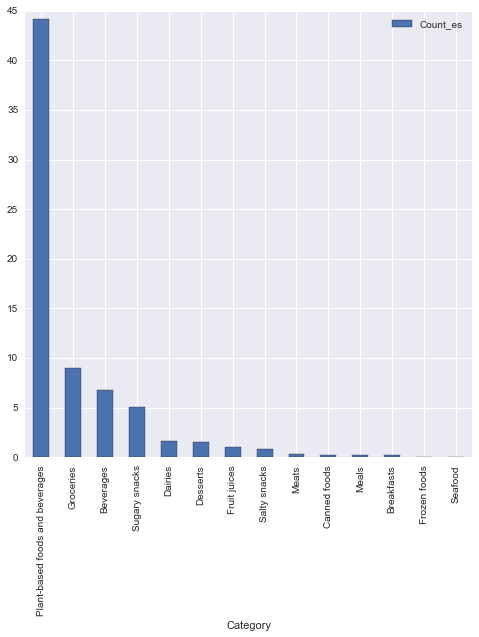

In [109]:
spain_df1 = spain_df.set_index('Category')
spain_df1.plot(kind="bar",
                 figsize=(8,8))

#### UK Categories

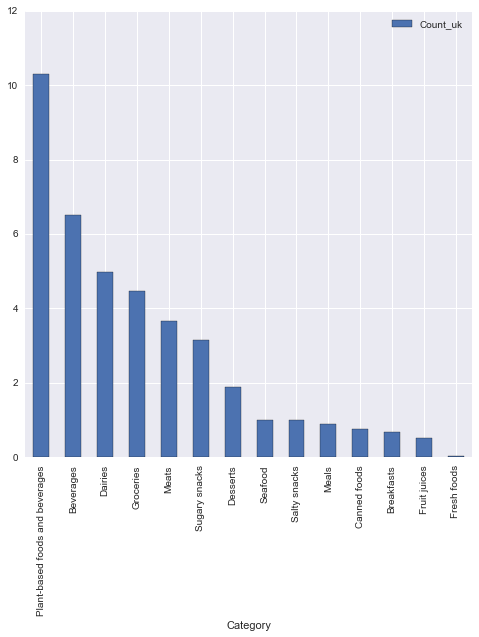

In [110]:
uk_df1 = uk_df.set_index('Category')
uk_df1.plot(kind="bar",
                 figsize=(8,8))

#### US Categories

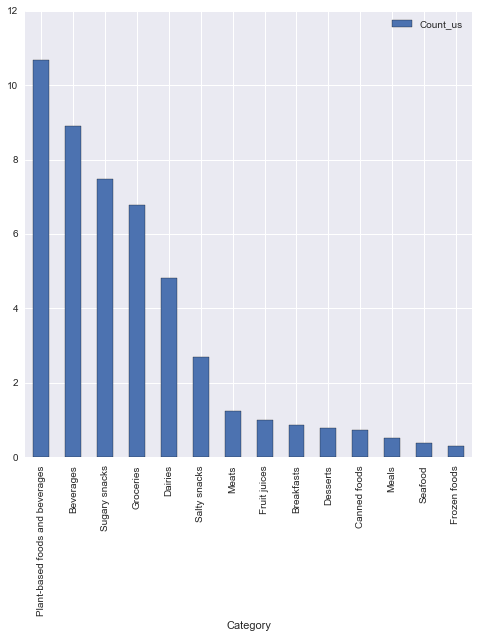

In [111]:
us_df1 = us_df.set_index('Category')
us_df1.plot(kind="bar",
                 figsize=(8,8))

#### Italy Categories

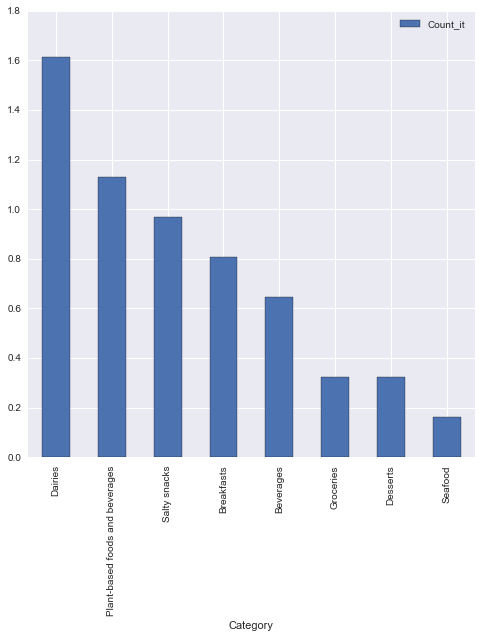

In [112]:
italy_df1 = italy_df.set_index('Category')
italy_df1.plot(kind="bar",
                 figsize=(8,8))

#### Australia Categories

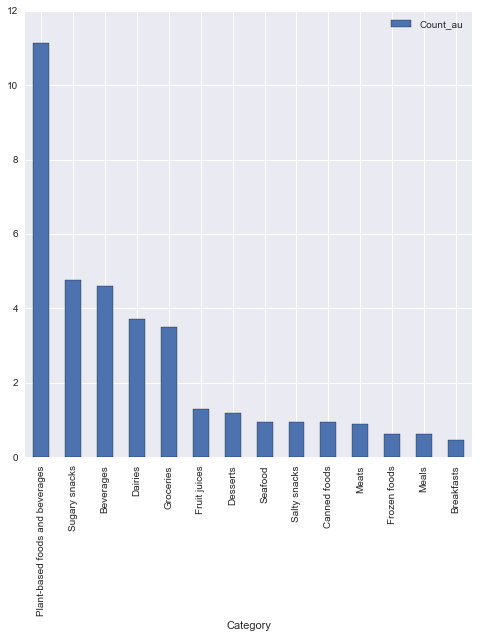

In [113]:
australia_df1 = australia_df.set_index('Category')
australia_df1.plot(kind="bar",
                 figsize=(8,8))

### Plot for each category together

In [115]:
df_1 = pd.merge(french_df, suisse_df,on='Category')
df_2 = pd.merge(german_df, spain_df,on='Category')
df_3 = pd.merge(uk_df, us_df,on='Category')
df_4 = pd.merge(italy_df, portugal_df,on='Category')
df_5 = pd.merge(belgium_df, australia_df,on='Category')
df_11 = pd.merge(df_1,df_2,on='Category')
df_12 = pd.merge(df_11, df_3,on='Category')
df_13 = pd.merge(df_12, df_4,on='Category')
df_combine = pd.merge(df_13, df_5,on='Category')
df_combine = df_combine.set_index("Category")

In [116]:
df_combine

,Count_fr,Count_ch,Count_de,Count_es,Count_uk,Count_us,Count_it,Count_pt,Count_be,Count_au
Category,,,,,,,,,,
Plant-based foods and beverages,15.784708,1.572510,16.479182,44.173913,10.305099,10.692042,1.129032,12.296564,0.972364,11.140167
Beverages,7.303823,1.223063,9.291454,6.807453,6.507361,8.892734,0.645161,7.956600,2.354145,4.602510
Dairies,5.350675,0.815376,14.696859,1.614907,4.992533,4.809689,1.612903,13.562387,0.614125,3.713389
Groceries,4.379132,0.698893,3.418554,9.018634,4.480478,6.782007,0.322581,5.244123,0.614125,3.504184
Salty snacks,1.914343,0.058241,0.993426,0.869565,1.002774,2.698962,0.967742,0.180832,0.051177,0.941423
Seafood,1.552170,0.058241,1.124909,0.024845,1.002774,0.380623,0.161290,0.180832,0.153531,0.941423


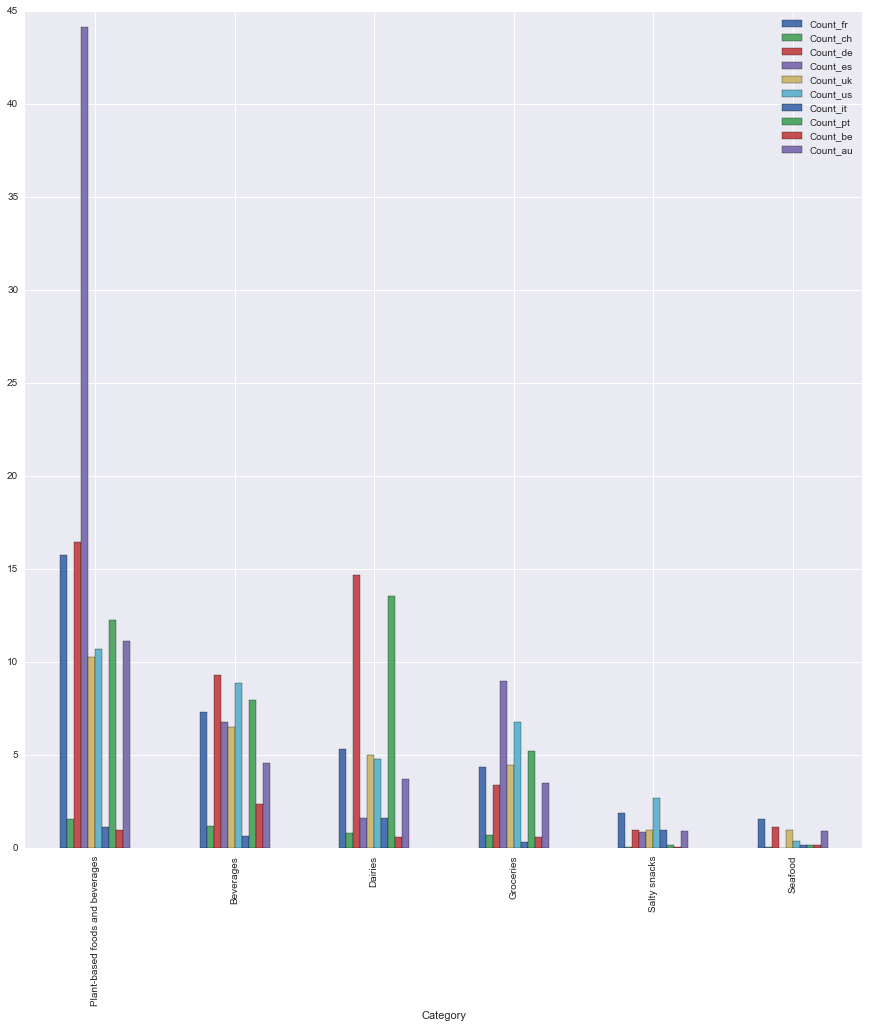

In [117]:
df_combine.plot(kind="bar", 
                 figsize=(15,15),
                 stacked=False)

From the graph above we can arrive at following conclusions-
Austrailans consume Plant based food and beverages the most.
Germans consume more Beverages than US and Portugal too
Germans consume more dairy products than Portugal
Americans eat a lot of salty snacks
French eat more of seafood than rest of the countries